In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [6]:
# INITIALIZE VARIABLES
N = 2000

T = 200
dt = 0.05

Kmin = 0
Kmax = 1.5
dK = 0.03

t = np.arange(0, T+dt, dt)
Krange = np.arange(Kmin, Kmax+dK, dK)

thetas = np.zeros((N, t.size))

f = np.zeros(N)

r = np.zeros((Krange.size,t.size))
psi = np.zeros((Krange.size,t.size))

def timer(start,end):   # Show execution time in the format "hours : minutes : seconds"
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Execution time (h:m:s): "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [56]:
for index in range(5):
    # RUN SIMULATION
    start_time = time.time()     #Initial time for execution time calculation

    for j in range(Krange.size):
        K = Krange[j]
        print("K: "+str(K))
        timer(start_time, time.time())       # Time of execution

        thetas[:,0] = np.random.uniform(0,2*np.pi,(1,N))  # the initial theta values: uniformly distributed between 0 and 2pi
        omegas = np.random.uniform(-0.5,0.5,N) # UNIFORMLY distributed natural frequencies. mean 0, sd 1, size (N,1); row vector

        for i in range(0,t.size):
            z = 1/N*np.sum(np.exp(0+1j*thetas[:,i])) # order parameter

            r[j,i] = np.absolute(z) # modulus. 
            psi[j,i] = np.angle(z) # global phase. NOTE: remove array if not used.

            f = omegas + K*r[j,i]*np.sin(psi[j,i]-thetas[:,i])

            if i >= t.size-1:
                break
            thetas[:,i+1] = thetas[:,i] + dt * f


    print("Code finished.")
    timer(start_time, time.time())       # Time of execution

    # SAVE FILE
    timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    np.savetxt("UNIFORM_r_data_"+timestring+".csv", r, delimiter=",")

K: 0.0
Execution time (h:m:s): 00:00:00.00
K: 0.03
Execution time (h:m:s): 00:00:00.81
K: 0.06
Execution time (h:m:s): 00:00:01.59
K: 0.09
Execution time (h:m:s): 00:00:02.36
K: 0.12
Execution time (h:m:s): 00:00:03.14
K: 0.15
Execution time (h:m:s): 00:00:03.90
K: 0.18
Execution time (h:m:s): 00:00:04.67
K: 0.21
Execution time (h:m:s): 00:00:05.44
K: 0.24
Execution time (h:m:s): 00:00:06.21
K: 0.27
Execution time (h:m:s): 00:00:06.99
K: 0.3
Execution time (h:m:s): 00:00:07.76
K: 0.32999999999999996
Execution time (h:m:s): 00:00:08.54
K: 0.36
Execution time (h:m:s): 00:00:09.40
K: 0.39
Execution time (h:m:s): 00:00:10.19
K: 0.42
Execution time (h:m:s): 00:00:10.96
K: 0.44999999999999996
Execution time (h:m:s): 00:00:11.74
K: 0.48
Execution time (h:m:s): 00:00:12.52
K: 0.51
Execution time (h:m:s): 00:00:13.28
K: 0.54
Execution time (h:m:s): 00:00:14.07
K: 0.57
Execution time (h:m:s): 00:00:14.83
K: 0.6
Execution time (h:m:s): 00:00:15.60
K: 0.63
Execution time (h:m:s): 00:00:16.37
K: 0.

K: 0.63
Execution time (h:m:s): 00:00:18.70
K: 0.6599999999999999
Execution time (h:m:s): 00:00:19.54
K: 0.69
Execution time (h:m:s): 00:00:20.36
K: 0.72
Execution time (h:m:s): 00:00:21.17
K: 0.75
Execution time (h:m:s): 00:00:21.98
K: 0.78
Execution time (h:m:s): 00:00:22.79
K: 0.8099999999999999
Execution time (h:m:s): 00:00:23.58
K: 0.84
Execution time (h:m:s): 00:00:24.36
K: 0.87
Execution time (h:m:s): 00:00:25.15
K: 0.8999999999999999
Execution time (h:m:s): 00:00:25.95
K: 0.9299999999999999
Execution time (h:m:s): 00:00:26.74
K: 0.96
Execution time (h:m:s): 00:00:27.53
K: 0.99
Execution time (h:m:s): 00:00:28.30
K: 1.02
Execution time (h:m:s): 00:00:29.08
K: 1.05
Execution time (h:m:s): 00:00:29.87
K: 1.08
Execution time (h:m:s): 00:00:30.65
K: 1.1099999999999999
Execution time (h:m:s): 00:00:31.42
K: 1.14
Execution time (h:m:s): 00:00:32.21
K: 1.17
Execution time (h:m:s): 00:00:32.99
K: 1.2
Execution time (h:m:s): 00:00:33.78
K: 1.23
Execution time (h:m:s): 00:00:34.54
K: 1.26

In [49]:
# SAVE FILE
timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

np.savetxt("UNIFORM_r_data_"+timestring+".csv", r, delimiter=",")

In [50]:
# LOAD FILE
filename = "UNIFORM_r_data_2021-01-18_15-58-25.csv"
rsaved = np.loadtxt(filename, delimiter=',')

rinf = rsaved[:,-1]  # last element is r_inf = r(T)

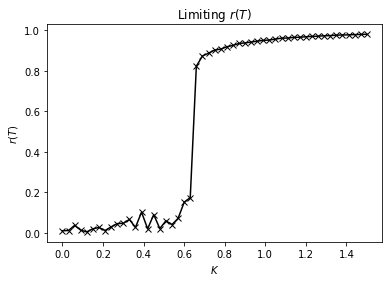

Code finished.


In [53]:
# (K,r(T)) PLOT FROM SAVED FILE
# NOTE that Krange is not specified in the saved file!

plt.plot(Krange, rinf,'-xk',label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title("Limiting "+r'$r(T)$')
plt.xlabel(r'$K$')
plt.ylabel(r'$r(T)$')

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("UNIFORM_limiting_r_"+timestring+".png" , dpi=600)    
plt.show()
print("Code finished.")

In [3]:
# AVERAGED (K,r(T)) PLOT FROM SAVED FILES
# LOAD FILES
file1 = "UNIFORM_r_data_2021-01-18_17-33-18.csv"
file2 = "UNIFORM_r_data_2021-01-18_17-34-00.csv"
file3 = "UNIFORM_r_data_2021-01-18_17-34-42.csv"
file4 = "UNIFORM_r_data_2021-01-18_17-35-25.csv"
file5 = "UNIFORM_r_data_2021-01-18_17-36-07.csv"

allr = np.stack((np.loadtxt(file1, delimiter=','),np.loadtxt(file2, delimiter=','),np.loadtxt(file3, delimiter=','),np.loadtxt(file4, delimiter=','),np.loadtxt(file5, delimiter=',') ))

rmean = np.mean(allr[:,:,-1], axis=0)  # last element is r_inf = r(T)
rstd = np.std(allr[:,:,-1], axis=0)
print("Code finished.")

Code finished.


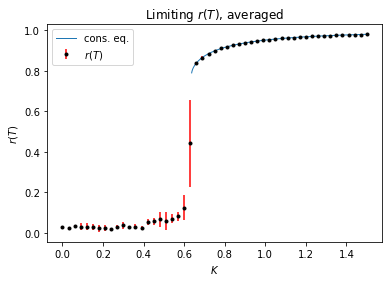

Code finished.


In [18]:
# PLOT
plt.plot(Krangecons, rcons,linewidth=1,label="cons. eq.")
plt.errorbar(Krange, rmean, yerr=rstd, fmt='.k', ecolor='r', capthick=1,label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title("Limiting "+r'$r(T)$'+", averaged")
plt.xlabel(r'$K$')
plt.ylabel(r'$r(T)$')
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("UNIFORM_Limiting_r_averaged_"+timestring+".png", dpi=600)    
plt.show()
print("Code finished.")

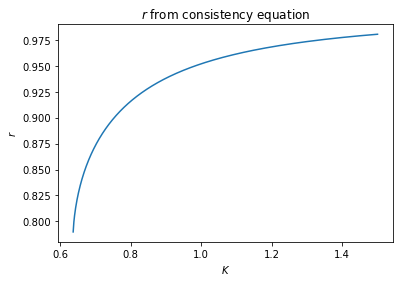

Code finished.


In [14]:
# PLOT FROM CONSISTENCY EQUATION
Krangecons=np.array([0.637, 0.638, 0.639, 0.64, 0.641, 0.642, 0.643, 0.644, 0.645, 0.646, \
0.647, 0.648, 0.649, 0.65, 0.651, 0.652, 0.653, 0.654, 0.655, 0.656, \
0.657, 0.658, 0.659, 0.66, 0.661, 0.662, 0.663, 0.664, 0.665, 0.666, \
0.667, 0.668, 0.669, 0.67, 0.671, 0.672, 0.673, 0.674, 0.675, 0.676, \
0.677, 0.678, 0.679, 0.68, 0.681, 0.682, 0.683, 0.684, 0.685, 0.686, \
0.687, 0.688, 0.689, 0.69, 0.691, 0.692, 0.693, 0.694, 0.695, 0.696, \
0.697, 0.698, 0.699, 0.7, 0.701, 0.702, 0.703, 0.704, 0.705, 0.706, \
0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716, \
0.717, 0.718, 0.719, 0.72, 0.721, 0.722, 0.723, 0.724, 0.725, 0.726, \
0.727, 0.728, 0.729, 0.73, 0.731, 0.732, 0.733, 0.734, 0.735, 0.736, \
0.737, 0.738, 0.739, 0.74, 0.741, 0.742, 0.743, 0.744, 0.745, 0.746, \
0.747, 0.748, 0.749, 0.75, 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, \
0.757, 0.758, 0.759, 0.76, 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, \
0.767, 0.768, 0.769, 0.77, 0.771, 0.772, 0.773, 0.774, 0.775, 0.776, \
0.777, 0.778, 0.779, 0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, \
0.787, 0.788, 0.789, 0.79, 0.791, 0.792, 0.793, 0.794, 0.795, 0.796, \
0.797, 0.798, 0.799, 0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, \
0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.813, 0.814, 0.815, 0.816, \
0.817, 0.818, 0.819, 0.82, 0.821, 0.822, 0.823, 0.824, 0.825, 0.826, \
0.827, 0.828, 0.829, 0.83, 0.831, 0.832, 0.833, 0.834, 0.835, 0.836, \
0.837, 0.838, 0.839, 0.84, 0.841, 0.842, 0.843, 0.844, 0.845, 0.846, \
0.847, 0.848, 0.849, 0.85, 0.851, 0.852, 0.853, 0.854, 0.855, 0.856, \
0.857, 0.858, 0.859, 0.86, 0.861, 0.862, 0.863, 0.864, 0.865, 0.866, \
0.867, 0.868, 0.869, 0.87, 0.871, 0.872, 0.873, 0.874, 0.875, 0.876, \
0.877, 0.878, 0.879, 0.88, 0.881, 0.882, 0.883, 0.884, 0.885, 0.886, \
0.887, 0.888, 0.889, 0.89, 0.891, 0.892, 0.893, 0.894, 0.895, 0.896, \
0.897, 0.898, 0.899, 0.9, 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, \
0.907, 0.908, 0.909, 0.91, 0.911, 0.912, 0.913, 0.914, 0.915, 0.916, \
0.917, 0.918, 0.919, 0.92, 0.921, 0.922, 0.923, 0.924, 0.925, 0.926, \
0.927, 0.928, 0.929, 0.93, 0.931, 0.932, 0.933, 0.934, 0.935, 0.936, \
0.937, 0.938, 0.939, 0.94, 0.941, 0.942, 0.943, 0.944, 0.945, 0.946, \
0.947, 0.948, 0.949, 0.95, 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, \
0.957, 0.958, 0.959, 0.96, 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, \
0.967, 0.968, 0.969, 0.97, 0.971, 0.972, 0.973, 0.974, 0.975, 0.976, \
0.977, 0.978, 0.979, 0.98, 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, \
0.987, 0.988, 0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, \
0.997, 0.998, 0.999, 1., 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, \
1.007, 1.008, 1.009, 1.01, 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, \
1.017, 1.018, 1.019, 1.02, 1.021, 1.022, 1.023, 1.024, 1.025, 1.026, \
1.027, 1.028, 1.029, 1.03, 1.031, 1.032, 1.033, 1.034, 1.035, 1.036, \
1.037, 1.038, 1.039, 1.04, 1.041, 1.042, 1.043, 1.044, 1.045, 1.046, \
1.047, 1.048, 1.049, 1.05, 1.051, 1.052, 1.053, 1.054, 1.055, 1.056, \
1.057, 1.058, 1.059, 1.06, 1.061, 1.062, 1.063, 1.064, 1.065, 1.066, \
1.067, 1.068, 1.069, 1.07, 1.071, 1.072, 1.073, 1.074, 1.075, 1.076, \
1.077, 1.078, 1.079, 1.08, 1.081, 1.082, 1.083, 1.084, 1.085, 1.086, \
1.087, 1.088, 1.089, 1.09, 1.091, 1.092, 1.093, 1.094, 1.095, 1.096, \
1.097, 1.098, 1.099, 1.1, 1.101, 1.102, 1.103, 1.104, 1.105, 1.106, \
1.107, 1.108, 1.109, 1.11, 1.111, 1.112, 1.113, 1.114, 1.115, 1.116, \
1.117, 1.118, 1.119, 1.12, 1.121, 1.122, 1.123, 1.124, 1.125, 1.126, \
1.127, 1.128, 1.129, 1.13, 1.131, 1.132, 1.133, 1.134, 1.135, 1.136, \
1.137, 1.138, 1.139, 1.14, 1.141, 1.142, 1.143, 1.144, 1.145, 1.146, \
1.147, 1.148, 1.149, 1.15, 1.151, 1.152, 1.153, 1.154, 1.155, 1.156, \
1.157, 1.158, 1.159, 1.16, 1.161, 1.162, 1.163, 1.164, 1.165, 1.166, \
1.167, 1.168, 1.169, 1.17, 1.171, 1.172, 1.173, 1.174, 1.175, 1.176, \
1.177, 1.178, 1.179, 1.18, 1.181, 1.182, 1.183, 1.184, 1.185, 1.186, \
1.187, 1.188, 1.189, 1.19, 1.191, 1.192, 1.193, 1.194, 1.195, 1.196, \
1.197, 1.198, 1.199, 1.2, 1.201, 1.202, 1.203, 1.204, 1.205, 1.206, \
1.207, 1.208, 1.209, 1.21, 1.211, 1.212, 1.213, 1.214, 1.215, 1.216, \
1.217, 1.218, 1.219, 1.22, 1.221, 1.222, 1.223, 1.224, 1.225, 1.226, \
1.227, 1.228, 1.229, 1.23, 1.231, 1.232, 1.233, 1.234, 1.235, 1.236, \
1.237, 1.238, 1.239, 1.24, 1.241, 1.242, 1.243, 1.244, 1.245, 1.246, \
1.247, 1.248, 1.249, 1.25, 1.251, 1.252, 1.253, 1.254, 1.255, 1.256, \
1.257, 1.258, 1.259, 1.26, 1.261, 1.262, 1.263, 1.264, 1.265, 1.266, \
1.267, 1.268, 1.269, 1.27, 1.271, 1.272, 1.273, 1.274, 1.275, 1.276, \
1.277, 1.278, 1.279, 1.28, 1.281, 1.282, 1.283, 1.284, 1.285, 1.286, \
1.287, 1.288, 1.289, 1.29, 1.291, 1.292, 1.293, 1.294, 1.295, 1.296, \
1.297, 1.298, 1.299, 1.3, 1.301, 1.302, 1.303, 1.304, 1.305, 1.306, \
1.307, 1.308, 1.309, 1.31, 1.311, 1.312, 1.313, 1.314, 1.315, 1.316, \
1.317, 1.318, 1.319, 1.32, 1.321, 1.322, 1.323, 1.324, 1.325, 1.326, \
1.327, 1.328, 1.329, 1.33, 1.331, 1.332, 1.333, 1.334, 1.335, 1.336, \
1.337, 1.338, 1.339, 1.34, 1.341, 1.342, 1.343, 1.344, 1.345, 1.346, \
1.347, 1.348, 1.349, 1.35, 1.351, 1.352, 1.353, 1.354, 1.355, 1.356, \
1.357, 1.358, 1.359, 1.36, 1.361, 1.362, 1.363, 1.364, 1.365, 1.366, \
1.367, 1.368, 1.369, 1.37, 1.371, 1.372, 1.373, 1.374, 1.375, 1.376, \
1.377, 1.378, 1.379, 1.38, 1.381, 1.382, 1.383, 1.384, 1.385, 1.386, \
1.387, 1.388, 1.389, 1.39, 1.391, 1.392, 1.393, 1.394, 1.395, 1.396, \
1.397, 1.398, 1.399, 1.4, 1.401, 1.402, 1.403, 1.404, 1.405, 1.406, \
1.407, 1.408, 1.409, 1.41, 1.411, 1.412, 1.413, 1.414, 1.415, 1.416, \
1.417, 1.418, 1.419, 1.42, 1.421, 1.422, 1.423, 1.424, 1.425, 1.426, \
1.427, 1.428, 1.429, 1.43, 1.431, 1.432, 1.433, 1.434, 1.435, 1.436, \
1.437, 1.438, 1.439, 1.44, 1.441, 1.442, 1.443, 1.444, 1.445, 1.446, \
1.447, 1.448, 1.449, 1.45, 1.451, 1.452, 1.453, 1.454, 1.455, 1.456, \
1.457, 1.458, 1.459, 1.46, 1.461, 1.462, 1.463, 1.464, 1.465, 1.466, \
1.467, 1.468, 1.469, 1.47, 1.471, 1.472, 1.473, 1.474, 1.475, 1.476, \
1.477, 1.478, 1.479, 1.48, 1.481, 1.482, 1.483, 1.484, 1.485, 1.486, \
1.487, 1.488, 1.489, 1.49, 1.491, 1.492, 1.493, 1.494, 1.495, 1.496, \
1.497, 1.498, 1.499, 1.5])

rcons=np.array([0.78989, 0.795497, 0.799518, 0.802866, 0.805804, 0.808456, 0.810893, \
0.813158, 0.815284, 0.817291, 0.819197, 0.821015, 0.822756, 0.824426, \
0.826034, 0.827586, 0.829085, 0.830537, 0.831946, 0.833314, 0.834643, \
0.835938, 0.8372, 0.83843, 0.839631, 0.840805, 0.841952, 0.843075, \
0.844174, 0.84525, 0.846306, 0.84734, 0.848355, 0.849352, 0.85033, \
0.851291, 0.852236, 0.853164, 0.854077, 0.854976, 0.85586, 0.85673, \
0.857587, 0.85843, 0.859262, 0.860081, 0.860888, 0.861684, 0.862469, \
0.863244, 0.864007, 0.864761, 0.865505, 0.866239, 0.866964, 0.867679, \
0.868386, 0.869084, 0.869773, 0.870455, 0.871128, 0.871793, 0.872451, \
0.873101, 0.873744, 0.874379, 0.875008, 0.875629, 0.876244, 0.876853, \
0.877454, 0.87805, 0.878639, 0.879222, 0.8798, 0.880371, 0.880937, \
0.881497, 0.882051, 0.8826, 0.883144, 0.883682, 0.884216, 0.884744, \
0.885267, 0.885786, 0.886299, 0.886808, 0.887313, 0.887813, 0.888308, \
0.888799, 0.889285, 0.889768, 0.890246, 0.89072, 0.89119, 0.891655, \
0.892117, 0.892575, 0.89303, 0.89348, 0.893927, 0.89437, 0.894809, \
0.895245, 0.895678, 0.896107, 0.896532, 0.896954, 0.897373, 0.897789, \
0.898201, 0.89861, 0.899016, 0.899419, 0.899819, 0.900216, 0.900609, \
0.901, 0.901388, 0.901773, 0.902156, 0.902535, 0.902912, 0.903286, \
0.903657, 0.904026, 0.904392, 0.904755, 0.905116, 0.905474, 0.90583, \
0.906183, 0.906534, 0.906883, 0.907229, 0.907572, 0.907914, 0.908253, \
0.90859, 0.908924, 0.909256, 0.909586, 0.909914, 0.91024, 0.910563, \
0.910885, 0.911204, 0.911522, 0.911837, 0.91215, 0.912461, 0.91277, \
0.913078, 0.913383, 0.913686, 0.913988, 0.914287, 0.914585, 0.914881, \
0.915175, 0.915467, 0.915757, 0.916046, 0.916333, 0.916618, 0.916902, \
0.917183, 0.917463, 0.917742, 0.918018, 0.918293, 0.918567, 0.918839, \
0.919109, 0.919377, 0.919645, 0.91991, 0.920174, 0.920436, 0.920697, \
0.920957, 0.921215, 0.921471, 0.921726, 0.92198, 0.922232, 0.922483, \
0.922732, 0.92298, 0.923227, 0.923472, 0.923716, 0.923958, 0.924199, \
0.924439, 0.924678, 0.924915, 0.925151, 0.925386, 0.925619, 0.925851, \
0.926082, 0.926312, 0.92654, 0.926767, 0.926993, 0.927218, 0.927442, \
0.927664, 0.927885, 0.928106, 0.928324, 0.928542, 0.928759, 0.928975, \
0.929189, 0.929402, 0.929615, 0.929826, 0.930036, 0.930245, 0.930453, \
0.93066, 0.930866, 0.931071, 0.931275, 0.931477, 0.931679, 0.93188, \
0.93208, 0.932279, 0.932476, 0.932673, 0.932869, 0.933064, 0.933258, \
0.933451, 0.933643, 0.933834, 0.934025, 0.934214, 0.934402, 0.93459, \
0.934776, 0.934962, 0.935147, 0.935331, 0.935514, 0.935696, 0.935877, \
0.936058, 0.936238, 0.936416, 0.936594, 0.936771, 0.936948, 0.937123, \
0.937298, 0.937472, 0.937645, 0.937817, 0.937988, 0.938159, 0.938329, \
0.938498, 0.938667, 0.938834, 0.939001, 0.939167, 0.939332, 0.939497, \
0.939661, 0.939824, 0.939986, 0.940148, 0.940309, 0.940469, 0.940629, \
0.940788, 0.940946, 0.941103, 0.94126, 0.941416, 0.941571, 0.941726, \
0.94188, 0.942033, 0.942186, 0.942338, 0.942489, 0.94264, 0.94279, \
0.942939, 0.943088, 0.943236, 0.943384, 0.943531, 0.943677, 0.943822, \
0.943967, 0.944112, 0.944256, 0.944399, 0.944541, 0.944683, 0.944825, \
0.944966, 0.945106, 0.945245, 0.945384, 0.945523, 0.945661, 0.945798, \
0.945935, 0.946071, 0.946207, 0.946342, 0.946476, 0.94661, 0.946744, \
0.946877, 0.947009, 0.947141, 0.947272, 0.947403, 0.947533, 0.947663, \
0.947792, 0.947921, 0.948049, 0.948176, 0.948304, 0.94843, 0.948556, \
0.948682, 0.948807, 0.948932, 0.949056, 0.94918, 0.949303, 0.949425, \
0.949548, 0.949669, 0.949791, 0.949911, 0.950032, 0.950152, 0.950271, \
0.95039, 0.950508, 0.950626, 0.950744, 0.950861, 0.950978, 0.951094, \
0.95121, 0.951325, 0.95144, 0.951554, 0.951668, 0.951782, 0.951895, \
0.952008, 0.95212, 0.952232, 0.952343, 0.952454, 0.952565, 0.952675, \
0.952785, 0.952894, 0.953003, 0.953112, 0.95322, 0.953328, 0.953435, \
0.953542, 0.953649, 0.953755, 0.953861, 0.953966, 0.954071, 0.954176, \
0.95428, 0.954384, 0.954488, 0.954591, 0.954693, 0.954796, 0.954898, \
0.955, 0.955101, 0.955202, 0.955302, 0.955402, 0.955502, 0.955602, \
0.955701, 0.9558, 0.955898, 0.955996, 0.956094, 0.956191, 0.956288, \
0.956385, 0.956481, 0.956577, 0.956673, 0.956768, 0.956863, 0.956958, \
0.957052, 0.957146, 0.95724, 0.957333, 0.957426, 0.957519, 0.957612, \
0.957704, 0.957795, 0.957887, 0.957978, 0.958069, 0.958159, 0.958249, \
0.958339, 0.958429, 0.958518, 0.958607, 0.958696, 0.958784, 0.958872, \
0.95896, 0.959047, 0.959134, 0.959221, 0.959308, 0.959394, 0.95948, \
0.959566, 0.959651, 0.959736, 0.959821, 0.959906, 0.95999, 0.960074, \
0.960158, 0.960241, 0.960325, 0.960407, 0.96049, 0.960572, 0.960654, \
0.960736, 0.960818, 0.960899, 0.96098, 0.961061, 0.961141, 0.961221, \
0.961301, 0.961381, 0.961461, 0.96154, 0.961619, 0.961697, 0.961776, \
0.961854, 0.961932, 0.962009, 0.962087, 0.962164, 0.962241, 0.962318, \
0.962394, 0.96247, 0.962546, 0.962622, 0.962697, 0.962772, 0.962847, \
0.962922, 0.962997, 0.963071, 0.963145, 0.963219, 0.963292, 0.963365, \
0.963439, 0.963511, 0.963584, 0.963656, 0.963729, 0.963801, 0.963872, \
0.963944, 0.964015, 0.964086, 0.964157, 0.964228, 0.964298, 0.964368, \
0.964438, 0.964508, 0.964577, 0.964647, 0.964716, 0.964785, 0.964853, \
0.964922, 0.96499, 0.965058, 0.965126, 0.965194, 0.965261, 0.965328, \
0.965395, 0.965462, 0.965529, 0.965595, 0.965662, 0.965728, 0.965793, \
0.965859, 0.965924, 0.96599, 0.966055, 0.96612, 0.966184, 0.966249, \
0.966313, 0.966377, 0.966441, 0.966505, 0.966568, 0.966631, 0.966695, \
0.966757, 0.96682, 0.966883, 0.966945, 0.967007, 0.967069, 0.967131, \
0.967193, 0.967254, 0.967316, 0.967377, 0.967438, 0.967498, 0.967559, \
0.967619, 0.96768, 0.96774, 0.9678, 0.967859, 0.967919, 0.967978, \
0.968037, 0.968096, 0.968155, 0.968214, 0.968272, 0.968331, 0.968389, \
0.968447, 0.968505, 0.968562, 0.96862, 0.968677, 0.968734, 0.968791, \
0.968848, 0.968905, 0.968962, 0.969018, 0.969074, 0.96913, 0.969186, \
0.969242, 0.969297, 0.969353, 0.969408, 0.969463, 0.969518, 0.969573, \
0.969628, 0.969682, 0.969736, 0.969791, 0.969845, 0.969899, 0.969952, \
0.970006, 0.970059, 0.970113, 0.970166, 0.970219, 0.970272, 0.970324, \
0.970377, 0.970429, 0.970482, 0.970534, 0.970586, 0.970638, 0.970689, \
0.970741, 0.970792, 0.970844, 0.970895, 0.970946, 0.970997, 0.971047, \
0.971098, 0.971148, 0.971199, 0.971249, 0.971299, 0.971349, 0.971399, \
0.971448, 0.971498, 0.971547, 0.971596, 0.971645, 0.971694, 0.971743, \
0.971792, 0.971841, 0.971889, 0.971937, 0.971986, 0.972034, 0.972082, \
0.972129, 0.972177, 0.972225, 0.972272, 0.972319, 0.972366, 0.972414, \
0.97246, 0.972507, 0.972554, 0.972601, 0.972647, 0.972693, 0.972739, \
0.972786, 0.972831, 0.972877, 0.972923, 0.972969, 0.973014, 0.973059, \
0.973105, 0.97315, 0.973195, 0.97324, 0.973284, 0.973329, 0.973374, \
0.973418, 0.973462, 0.973507, 0.973551, 0.973595, 0.973638, 0.973682, \
0.973726, 0.973769, 0.973813, 0.973856, 0.973899, 0.973942, 0.973985, \
0.974028, 0.974071, 0.974113, 0.974156, 0.974198, 0.974241, 0.974283, \
0.974325, 0.974367, 0.974409, 0.974451, 0.974492, 0.974534, 0.974575, \
0.974617, 0.974658, 0.974699, 0.97474, 0.974781, 0.974822, 0.974863, \
0.974903, 0.974944, 0.974984, 0.975025, 0.975065, 0.975105, 0.975145, \
0.975185, 0.975225, 0.975265, 0.975304, 0.975344, 0.975383, 0.975423, \
0.975462, 0.975501, 0.97554, 0.975579, 0.975618, 0.975657, 0.975695, \
0.975734, 0.975772, 0.975811, 0.975849, 0.975887, 0.975925, 0.975963, \
0.976001, 0.976039, 0.976077, 0.976114, 0.976152, 0.976189, 0.976227, \
0.976264, 0.976301, 0.976338, 0.976375, 0.976412, 0.976449, 0.976486, \
0.976523, 0.976559, 0.976596, 0.976632, 0.976668, 0.976705, 0.976741, \
0.976777, 0.976813, 0.976849, 0.976884, 0.97692, 0.976956, 0.976991, \
0.977027, 0.977062, 0.977097, 0.977133, 0.977168, 0.977203, 0.977238, \
0.977273, 0.977307, 0.977342, 0.977377, 0.977411, 0.977446, 0.97748, \
0.977514, 0.977549, 0.977583, 0.977617, 0.977651, 0.977685, 0.977718, \
0.977752, 0.977786, 0.977819, 0.977853, 0.977886, 0.97792, 0.977953, \
0.977986, 0.978019, 0.978052, 0.978085, 0.978118, 0.978151, 0.978184, \
0.978216, 0.978249, 0.978282, 0.978314, 0.978346, 0.978379, 0.978411, \
0.978443, 0.978475, 0.978507, 0.978539, 0.978571, 0.978603, 0.978634, \
0.978666, 0.978697, 0.978729, 0.97876, 0.978792, 0.978823, 0.978854, \
0.978885, 0.978916, 0.978947, 0.978978, 0.979009, 0.97904, 0.979071, \
0.979101, 0.979132, 0.979162, 0.979193, 0.979223, 0.979253, 0.979284, \
0.979314, 0.979344, 0.979374, 0.979404, 0.979434, 0.979464, 0.979493, \
0.979523, 0.979553, 0.979582, 0.979612, 0.979641, 0.979671, 0.9797, \
0.979729, 0.979758, 0.979788, 0.979817, 0.979846, 0.979874, 0.979903, \
0.979932, 0.979961, 0.97999, 0.980018, 0.980047, 0.980075, 0.980104, \
0.980132, 0.98016, 0.980188, 0.980217, 0.980245, 0.980273, 0.980301, \
0.980329, 0.980357, 0.980384])

plt.plot(Krangecons, rcons,label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title(r'$r$'+" from consistency equation")
plt.xlabel(r'$K$')
plt.ylabel(r'$r$')

plt.savefig("analytical_r", dpi=600)    
plt.show()
print("Code finished.")